## Post-smoothing with GRIPS in Polygon Environments
GRIPS is now supported to run in polygon-based environments

In [3]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from mpb import MPB, MultipleMPB
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt

In [22]:
def run(scenario: str, start: {str: float}, goal: {str: float}, robot_model: str = None):
    m = MPB()
    m["max_planning_time"] = 30
    m["env.start"] = start
    m["env.goal"] = goal
    m["env.type"] = "polygon"
    m["env.polygon.source"] = "polygon_mazes/%s.svg" % scenario
    if robot_model:
        print("Using robot model %s." % robot_model)
        m["env.collision.robot_shape_source"] = robot_model
    m.set_planners(['informed_rrt_star'])
    m.set_smoothers(["grips"])
    if m.run(id="test_%s" % scenario, runs=5) == 0:
        m.visualize_trajectories(draw_start_goal_thetas=True, plot_every_nth_polygon=1, silence=True, show_smoother=True)
        m.print_info()
        m.plot_smoother_stats()

Running MPB with ID test_parking2 (log file at test_parking2.log)...


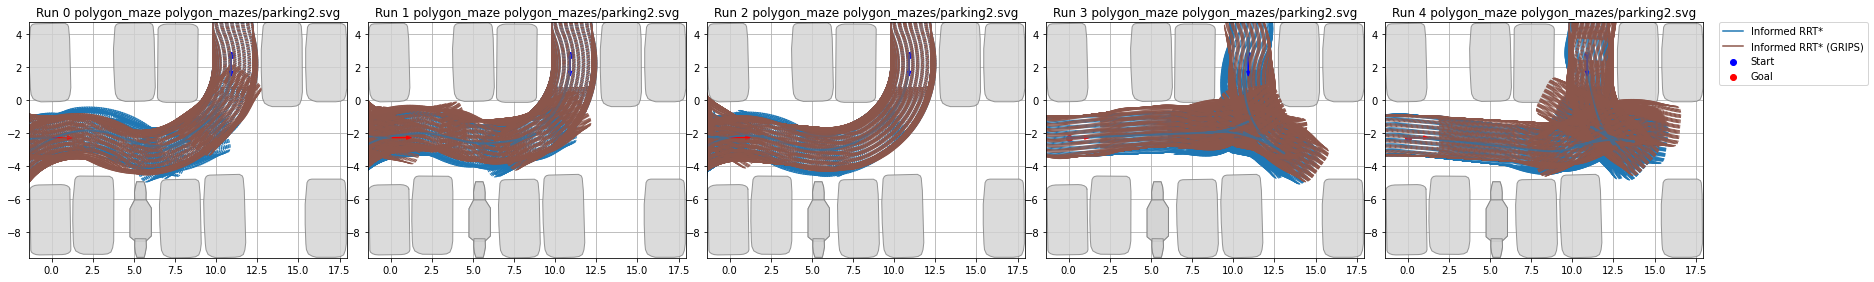

+++++++++++++++++++++++++ Run #0 (1 / 5) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/parking2.svg
+ Planners:        InformedRRTstar
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #1 (2 / 5) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/parking2.svg
+ Planners:        InformedRRTstar
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #2 (3 / 5) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/parking2.svg
+ Planners:        InformedRRTstar
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
+++++++++++++++++++++++++++++++++++++++++++++++++++

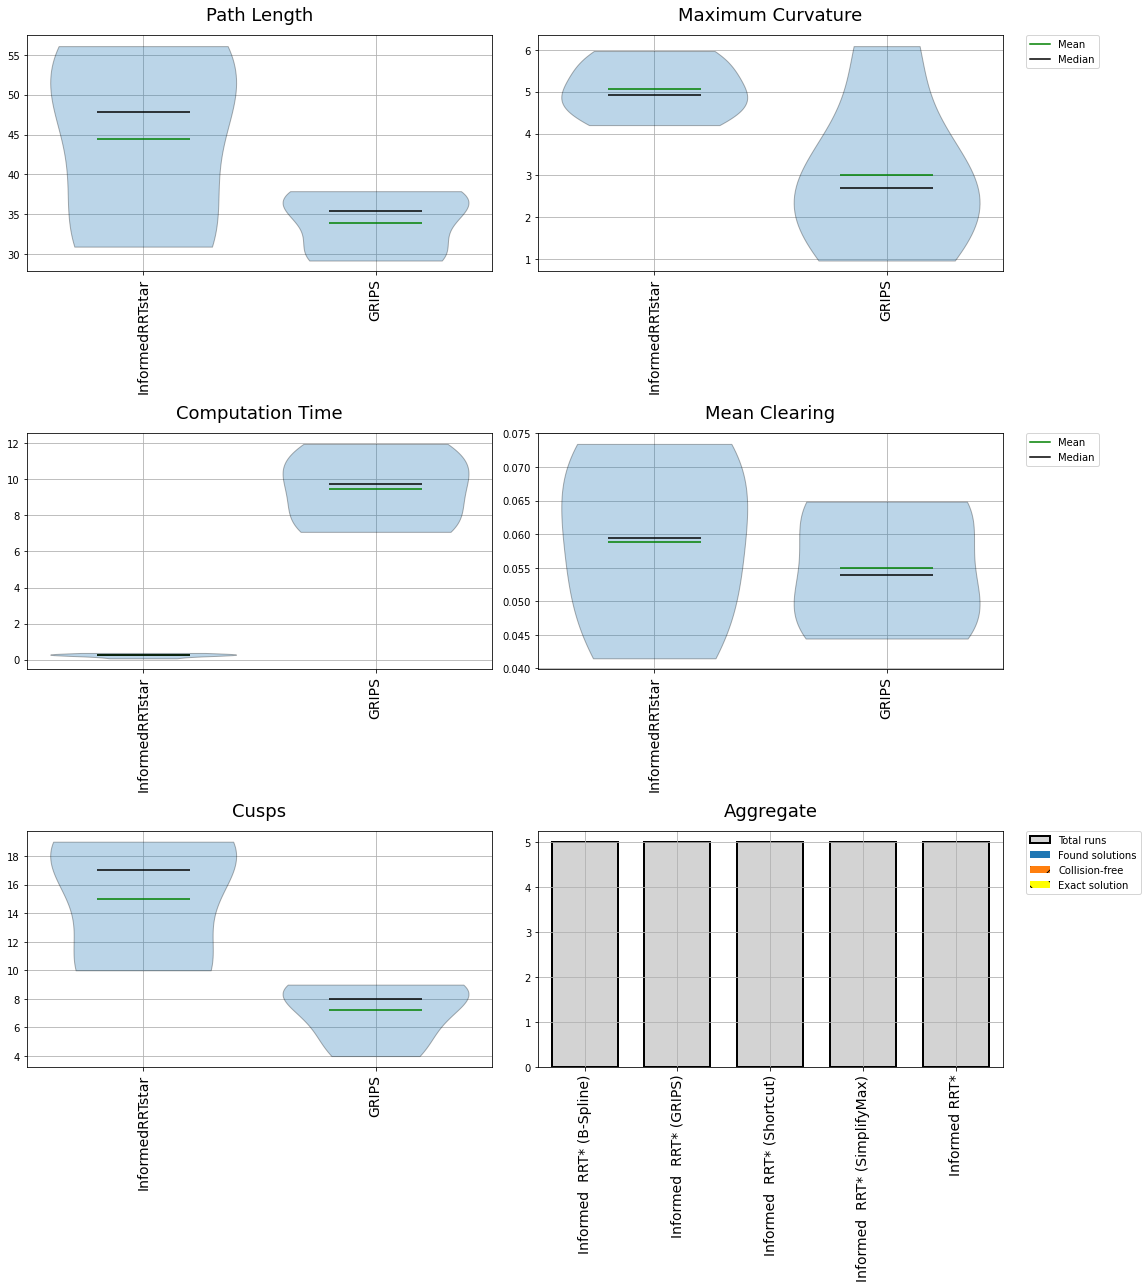

In [23]:
run("parking2", {"theta": -1.57, "x": 10.91, "y": 2.73}, {"theta": 0, "x": 0, "y": -2.27})